#Group Exercise
1. Firdaus Zamroni Fauzi
2. Muhamad Cahyo Wicaksono
3. Muhammad Umar Fatwa Ilhami

## Define Problem
---
### Rumusan Masalah :
- Seiring berkembangnya teknologi, industri game juga ikut berkembang. Dengan meningkatnya popularitas video games secara global dengan inovasi pengembangan video games.
- Tahun 2024, pasar video games (vg) diproyeksikan mendapatkan penghasilan US$282,30 juta
- 3 Tahun mendatang diperkirakan pasar vg tumbuh 8,76% sehingga pada tahun 2027 diperkirakan volume pasar video game mencapai US\$363,20 juta
- Dengan pengguna dalam pasar vg hampir mencapai 1,5 juta pengguna.
- Lalu bagaimanakah ringkasan kondisi pasar video game untuk memanfaatkan peluang tersebut?
Source : Market Insight Video Games - Worldwide Statista

### Tujuan :
- Memberikan informasi dan gambaran pasar video game saat ini, untuk mendukung pengambilan keputusan para stakeholder (investor dan developer game).

- Mempromosikan peluang terkait perkembangan dunia game terhadap stakeholder.



## Data Understanding
---
- Dataset Video game Sales yang berisi lebih dari 16.500 data dengan 10 variabel. Data ini diambil dari pemilik yang bernama arslan ali dalam website kaggle.com.
- Dataset berisi daftar video game dengan penjualan lebih dari 100.000 copy. Sehingga dapat diasumsikan bahwa video game yang ada pada dataset ini adalah video game favorit.
- Dataset ini berisi data penjualan semua video game di beberapa region yang nantinya diurutkan berdasarkan total penjualan secara global.
- Data diidapatkan dari hasil scrape di website vgchartz.com.

### Batasan Data
- Data yang digunakan murni dari dataset vgsales.csv
  - Sehingga banyak daftar video game yang tidak termuat dalam dataset, seperti online game, mobile game, dan game yang baru dirilis.
  - Kurangnya atribut yang digunakan seperti jumlah copy yang terjual, harga game dan daerah rilis game

- Data diambil pada tahun 2020
  - Kurang relevan dengan perkembangan game di tahun selanjutnya

- Data diambil dari website vgchartz.com
  - sehingga kevalidannya kurang terjamin

- Data diambil  untuk tujuan personal
  - Data diisi dan diupdate oleh user community kurang dalam QC / standar pengisian







## Import Library dan Data
---

In [ ]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_vgsales = pd.read_csv("vgsales.csv")
df_vgsales.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


## Data Cleaning
---

### Pengecekan Data Type dan Penulisan

In [ ]:
df_vgsales.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [ ]:
df_vgsales.info()
#Kesalahan data tipe pada kolom year yang harusnya int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


#### Kolom Year

In [ ]:
df_vgsales["Year"].sort_values().unique()
#Masih terdapat data yang tidak konsisten

array(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2020',
       'Adventure', nan], dtype=object)

In [ ]:
#Cek data dengan kolom year yang bernilai Adventure
df_vgsales[df_vgsales["Year"]=="Adventure"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11593,11595,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,2007,Adventure,Sony Computer Entertainment,0,0.0,0.08,0.0,0.08,NaN
13538,13540,B's-LOG Party??PSP,2010,Adventure,Idea Factory,0,0.0,0.04,0.0,0.04,NaN


In [ ]:
#Membetulkan kolom dari data berindex 11593 dan 13538
df_vgsales.loc[df_vgsales["Rank"].isin([13540,11595]),"Publisher"]= df_vgsales["Genre"]
df_vgsales.loc[df_vgsales["Rank"].isin([13540,11595]),"Genre"]= df_vgsales["Year"]
df_vgsales.loc[df_vgsales["Rank"].isin([13540,11595]),"Year"]= df_vgsales["Platform"]
df_vgsales.loc[df_vgsales["Rank"].isin([13540,11595])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11593,11595,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,2007,2007,Adventure,Sony Computer Entertainment,0.0,0.08,0.0,0.08,NaN
13538,13540,B's-LOG Party??PSP,2010,2010,Adventure,Idea Factory,0.0,0.04,0.0,0.04,NaN


In [ ]:
df_vgsales.loc[df_vgsales["Rank"].isin([13540,11595]),"Name"]

11593    Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...
13538                                   B's-LOG Party??PSP
Name: Name, dtype: object

In [ ]:
judul = df_vgsales.loc[df_vgsales["Rank"].isin([13540]),"Name"].iloc[0]
patt = "(?<=\?)[A-Z]{3}"
word = re.findall(pattern=patt,string=judul)
df_vgsales.loc[df_vgsales["Rank"].isin([13540]),"Platform"]=word

df_vgsales.loc[df_vgsales["Rank"].isin([13540])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13538,13540,B's-LOG Party??PSP,PSP,2010,Adventure,Idea Factory,0.0,0.04,0.0,0.04,NaN


In [ ]:
df_vgsales["Year"].sort_values().unique()
#Sudah Konsisten

array(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2020', nan],
      dtype=object)

#### Kolom Platform

In [ ]:
df_vgsales["Platform"].sort_values().unique()
#Masih terdapat data yang tidak konsisten

array(['2007', '2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN',
       'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4',
       'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU',
       'X360', 'XB', 'XOne'], dtype=object)

In [ ]:
df_vgsales.loc[df_vgsales["Platform"]=="2007"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11593,11595,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,2007,2007,Adventure,Sony Computer Entertainment,0.0,0.08,0.0,0.08,NaN


In [ ]:
judul = df_vgsales.loc[df_vgsales["Rank"]==11595,"Name"].iloc[0]
patt = "(?<=\?)[A-Z0-9]{3}"
word = re.findall(pattern=patt,string=judul)
df_vgsales.loc[df_vgsales["Rank"].isin([11595]),"Platform"]=word

df_vgsales.loc[df_vgsales["Rank"].isin([13540])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13538,13540,B's-LOG Party??PSP,PSP,2010,Adventure,Idea Factory,0.0,0.04,0.0,0.04,NaN


In [ ]:
df_vgsales["Platform"].sort_values().unique()
#data sudah konsisten

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

#### Kolom Genre

In [ ]:
df_vgsales["Genre"].sort_values().unique()
#data sudah konsisten

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

#### Kolom Publisher

In [ ]:
df_vgsales["Publisher"].sort_values().unique()
#Ada publisher yang "Unknown" maka dicari publihser dari game tersebut

array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy', '3DO', '49Games', '505 Games', '5pb', '7G//AMES',
       '989 Sports', '989 Studios', 'AQ Interactive', 'ASC Games',
       'ASCII Entertainment', 'ASCII Media Works', 'ASK', 'Abylight',
       'Acclaim Entertainment', 'Accolade', 'Ackkstudios', 'Acquire',
       'Activision', 'Activision Blizzard', 'Activision Value',
       'Adeline Software', 'Aerosoft', 'Agatsuma Entertainment', 'Agetec',
       'Aksys Games', 'Alawar Entertainment', 'Alchemist',
       'Alternative Software', 'Altron', 'Alvion', 'American Softworks',
       'Angel Studios', 'Answer Software', 'Aqua Plus', 'Aques',
       'Arc System Works', 'Arena Entertainment', 'Aria', 'Arika',
       'ArtDink', 'Aruze Corp', 'Ascaron Entertainment',
       'Ascaron Entertainment GmbH', 'Asgard', 'Asmik Ace Entertainment',
       'Asmik Corp', 'Aspyr', 'Astragon', 'Asylum Entertainment', 'Atari',
       'Athena', 'Atlus', 'Avalon Interactive

In [ ]:
pub_unknown = df_vgsales[df_vgsales["Publisher"]=="Unknown"]
pub_unknown.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
940,942,Gran Turismo Concept 2001 Tokyo,PS2,2001,Racing,Unknown,0.00,1.10,0.42,0.33,1.84
1649,1651,NASCAR Thunder 2003,PS2,NaN,Racing,Unknown,0.60,0.46,0.00,0.16,1.22
2114,2116,Suikoden III,PS2,NaN,Role-Playing,Unknown,0.29,0.23,0.38,0.08,0.98
2173,2175,Wheel of Fortune,PS2,NaN,Misc,Unknown,0.47,0.36,0.00,0.12,0.95
2236,2238,Teenage Mutant Ninja Turtles,GBA,2003,Action,Unknown,0.67,0.25,0.00,0.02,0.93


In [ ]:
pub_unknown = pd.read_excel("Publisher Unknown.xlsx")
pub_unknown = pub_unknown.set_index("index")
df_vgsales.loc[df_vgsales["Publisher"]=="Unknown","Publisher"]=pub_unknown["Publisher"]
df_vgsales.loc[df_vgsales["Publisher"]=="Unknown"]
# Sudah tidak ada Publihser yang tidak diketahui


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


### Identifikasi Data Anomali

#### Missing Value

untuk pengsian missing value dilakukan dengan mencari nilai kolom sesuai informasi dari internet

In [ ]:
df_vgsales.isnull().sum()
#terdapat missing value pada kolom year, publisher, global sale.

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher       161
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

##### Kolom Year


In [ ]:
df_vgsales[df_vgsales['Year'].isnull()].head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17


In [ ]:
missing_year = pd.read_excel("Missing Year.xlsx")
missing_year.set_index("Unnamed: 0",inplace=True)
missing_year

,Rank,Name,Year,Publisher
Unnamed: 0,,,,
179,180,Madden NFL 2004,2003,Electronic Arts
377,378,FIFA Soccer 2004,2003,Electronic Arts
431,432,LEGO Batman: The Videogame,2008,Warner Bros. Interactive Entertainment
470,471,wwe Smackdown vs. Raw 2006,2005,THQ
607,608,Space Invaders,1978,Atari
...,...,...,...,...
16307,16310,Freaky Flyers,2003,Midway Games
16327,16330,Inversion,2012,Namco Bandai Games
16366,16369,Hakuouki: Shinsengumi Kitan,2008,Idea Factory


In [ ]:
df_vgsales.loc[df_vgsales['Year'].isnull(),"Publisher"] = missing_year["Publisher"]
df_vgsales.loc[df_vgsales['Year'].isnull(),"Year"] = missing_year["Year"]
df_vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df_vgsales.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     2
dtype: int64

In [ ]:
df_vgsales["Year"] = df_vgsales["Year"].astype(int)
df_vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16562 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


##### Kolom Publisher

In [ ]:
df_vgsales[df_vgsales['Publisher'].isnull()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.38,0.14,0.0,0.01,0.53


In [ ]:
missing_pub = pd.read_excel("Missing Publisher.xlsx")
missing_pub.set_index("index",inplace=True)
missing_pub.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
index,,,,,,,,,,,
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,Majesco Entertainment,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005,Misc,Sony Computer Entertainment,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,Nitendo,0.46,0.17,0.0,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,Nitendo,0.46,0.17,0.0,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,Majesco Entertainment,0.38,0.14,0.0,0.01,0.53


In [ ]:
df_vgsales.loc[df_vgsales['Publisher'].isnull(),"Publisher"] = missing_pub["Publisher"]


In [ ]:
df_vgsales.isnull().sum()
#Publisher sudah tidak ada yang missing

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    2
dtype: int64

##### Kolom Global Sales

In [ ]:
df_vgsales[df_vgsales['Global_Sales'].isnull()]
#Global Sale didapat dengan menjumlahkan EU, JP, NA, Other Sales sehingga nilai kosong bisa diisi.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11593,11595,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,PS3,2007,Adventure,Sony Computer Entertainment,0.0,0.08,0.0,0.08,NaN
13538,13540,B's-LOG Party??PSP,PSP,2010,Adventure,Idea Factory,0.0,0.04,0.0,0.04,NaN


In [ ]:
df_vgsales.loc[df_vgsales['Global_Sales'].isnull(),"Global_Sales"] = df_vgsales['NA_Sales'] + df_vgsales['EU_Sales'] + df_vgsales['JP_Sales'] + df_vgsales['Other_Sales']

In [ ]:
df_vgsales.isnull().sum()
#Sudah tidak ada kolom dengan data yang misssing

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Outlier

<Axes: >

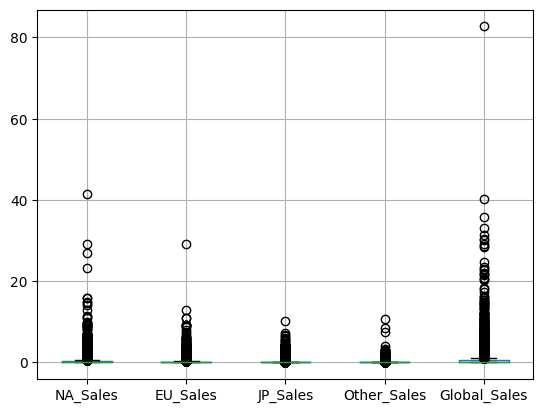

In [ ]:
df_vgsales.boxplot(["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"])

Terdapat outlier pada penjualan disemua tempat penjualan, namun nilai ini kami tetap pertahankan karena :
1. Data merupakan data peringkat video game berdasarkan penjualannya, jadi nilainya sangat bervariasi.
2. Data tidak memandang dimana game tersebut diterbitkan namun banyak game yang hanya diterbitkan di satu region saja sehingga penjualan di region lain itu tidak ada.
3. Data hanya menampilkan hasil penjualan bukan berupa total copy yang dijual. Dan data penjualannya tidak tahu apakah di update atau tidak.

### Duplikat

In [ ]:
df_vgsales.duplicated().sum()

0

In [ ]:
df_vgsales[df_vgsales.drop("Rank",axis=1).duplicated(keep=False)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14997,15000,Wii de Asobu: Metroid Prime,Wii,2002,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
14999,15002,Wii de Asobu: Metroid Prime,Wii,2002,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [ ]:
df_vgsales = df_vgsales.drop(14999)

In [ ]:
df_vgsales.drop("Rank",axis=1).duplicated().sum()
#Sudah tidak ada data duplikat

0

Data sudah selesai dibersihkan dan siap dilakukan analisis

In [ ]:
# from google.colab import files
df_vgsales.to_csv('vgsales_clean.csv')
# files.download('vgsales_clean.csv')

## Hasil Analisis
---

### Platform yang paling banyak digunakan Developer

In [ ]:
# Platform apa yang menjadi platform yang paling banyak digunakan.
df_groupmostplatform = df_vgsales.groupby('Platform')[['Name']].count().sort_values(by = "Name",ascending=False).head(10).reset_index()
df_groupmostplatform.head(1)

,Platform,Name
0,DS,2163


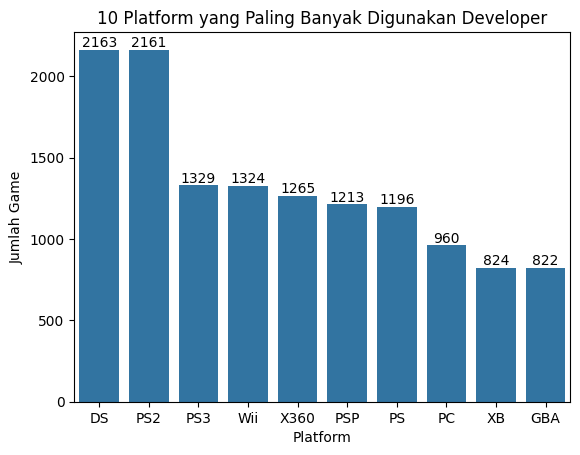

In [ ]:
ax=sns.barplot(df_groupmostplatform,x="Platform",y="Name")
ax.bar_label(ax.containers[0])
plt.title("10 Platform yang Paling Banyak Digunakan Developer")
plt.ylabel("Jumlah Game")
plt.show()

### Platform yang paling banyak menghasilkan sales pada 10 tahun terakhir.

In [ ]:
idmx = df_vgsales.groupby('Year')['Global_Sales'].idxmax()
maxi = df_vgsales.loc[idmx,["Year","Platform","Global_Sales"]]
idmn = df_vgsales.groupby('Year')['Global_Sales'].idxmin()
mini = df_vgsales.loc[idmn,["Year","Platform","Global_Sales"]]
df_platfrom3year = maxi.merge(mini,on="Year",suffixes=('_Max', '_Min'))
df_platfrom3year.sort_values(by="Year",ascending=False).head(10)

,Year,Platform_Max,Global_Sales_Max,Platform_Min,Global_Sales_Min
42,2020,DS,0.29,DS,0.29
41,2019,DS,0.06,PC,0.04
40,2017,2600,0.38,PSV,0.01
39,2016,PS4,4.77,PSV,0.01
38,2015,PS4,14.24,XOne,0.01
37,2014,PS4,11.98,X360,0.01
36,2013,PS3,21.40,X360,0.01
35,2012,PS3,14.03,PSP,0.01
34,2011,X360,14.76,PSP,0.01
33,2010,X360,21.82,PSP,0.01


In [ ]:
platform = df_vgsales.groupby(['Year',"Platform"])['Global_Sales'].sum().reset_index()
platform = platform.loc[platform["Year"].isin([2016,2015,2014,2013,2012,2011,2010])]
pt = pd.pivot_table(platform,values="Global_Sales", index="Year", columns="Platform")
pt["sum"]=pt.sum(axis=1)
pt = (pt.div(pt["sum"], axis=0) * 100).round(2)
pt.drop("sum",axis=1,inplace=True)

<Figure size 1000x2000 with 0 Axes>

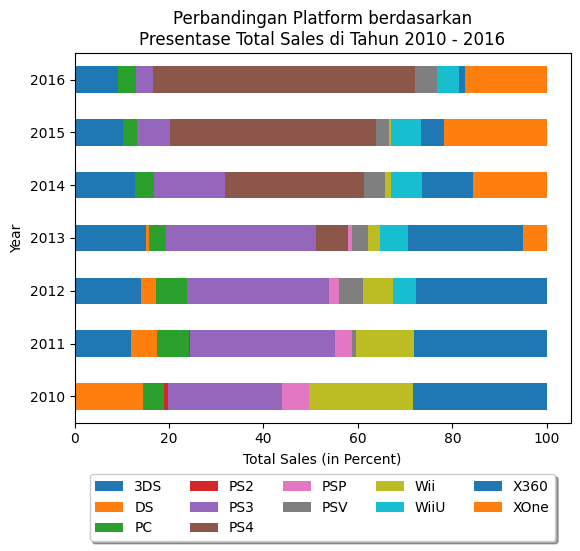

In [ ]:
#Tambahin Bar Value
plt.figure(figsize=(10,20))
ax = pt.plot.barh(
    stacked = True,
    xlabel = "Total Sales (in Percent)",
    title = 'Perbandingan Platform berdasarkan\nPresentase Total Sales di Tahun 2010 - 2016',
    mark_right = True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=5)
plt.show()

### Publisher yang paling banyak menghasilkan sales di Jepang

In [ ]:
# Publisher apa yang paling banyak menghasilkan sales di Jepang.
df_publisherjpn = df_vgsales.groupby('Publisher')[['JP_Sales']].sum().sort_values(by='JP_Sales',ascending=False).head(10)
df_publisherjpn.head(1)

,JP_Sales
Publisher,
Nintendo,455.4


<ipython-input-47-9e4222e8ba87>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Nitendo","Bandai","Konami","Sony","Capcom","Sega","Square Enix","SquareSoft","Enix Corp","Tecmo Koei"])


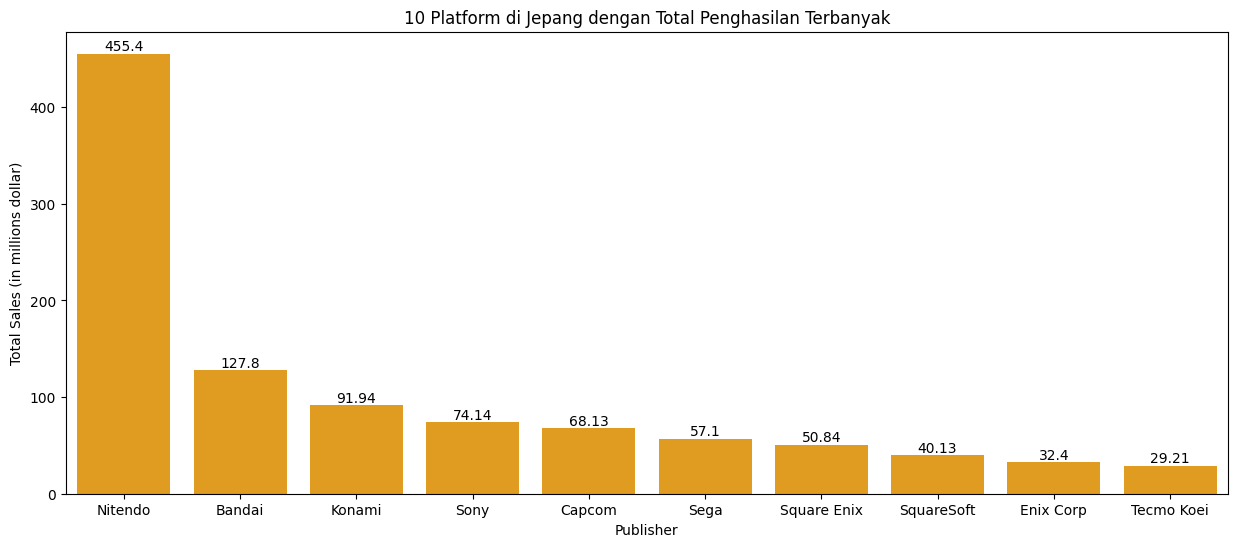

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(df_publisherjpn,x="Publisher",y="JP_Sales", color='orange')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(["Nitendo","Bandai","Konami","Sony","Capcom","Sega","Square Enix","SquareSoft","Enix Corp","Tecmo Koei"])
plt.title("10 Platform di Jepang dengan Total Penghasilan Terbanyak")
plt.ylabel("Total Sales (in millions dollar)")
plt.show()

### Perbandingan Genre berdasarkan Jumlah Game.


In [ ]:
# Genre terfavorit sepanjang masa.
df_genre = df_vgsales.groupby('Genre')[['Name']].count().sort_values(by = "Name",ascending=False).reset_index()
df_genre["Explode"] = [0.1,0,0,0,0,0,0,0,0,0,0,0]
df_genre.head(1)

,Genre,Name,Explode
0,Action,3316,0.1


Text(0.5, 1.0, 'Perbandingan Genre \n Berdasarkan Jumlah Game')

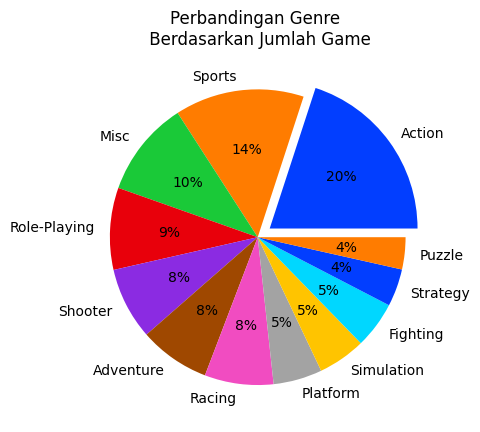

In [ ]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(df_genre["Name"], labels=df_genre["Genre"], explode=df_genre["Explode"], colors=palette_color,autopct='%.0f%%')
plt.title("Perbandingan Genre \n Berdasarkan Jumlah Game")
# displaying chart

### Perbandignan Genre berdasarkan Jumlah Game di 5 tahun terakhir.


In [ ]:
df_genre = df_vgsales.groupby(['Year','Genre'])['Name'].count().reset_index().rename({"Name":"Amount"},axis=1)
idmx = df_genre.groupby('Year')['Amount'].idxmax()
maxi = df_genre.loc[idmx,["Year","Genre","Amount"]]
idmn = df_genre.groupby('Year')['Amount'].idxmin()
mini = df_genre.loc[idmn,["Year","Genre","Amount"]]
df_platfrom5year = maxi.merge(mini,on="Year",suffixes=('_Max', '_Min'))
df_platfrom5year.sort_values(by="Year",ascending=False).head(10)

,Year,Genre_Max,Amount_Max,Genre_Min,Amount_Min
42,2020,Simulation,1,Simulation,1
41,2019,Racing,2,Racing,2
40,2017,Role-Playing,2,Action,1
39,2016,Action,119,Simulation,9
38,2015,Action,255,Puzzle,6
37,2014,Action,186,Puzzle,8
36,2013,Action,151,Puzzle,3
35,2012,Action,266,Platform,12
34,2011,Action,256,Platform,37
33,2010,Action,228,Platform,32


In [ ]:
genre = df_vgsales.groupby(['Year',"Genre"])['Name'].count().reset_index().rename({"Name":"Amount"},axis=1)
genre = genre.loc[genre["Year"].isin([2017,2016,2015,2014,2013,2012,2011,2010])]
pt = pd.pivot_table(genre,values="Amount", index="Year", columns="Genre")
pt["sum"]=pt.sum(axis=1)
pt = (pt.div(pt["sum"], axis=0) * 100).round(2)
pt.drop("sum",axis=1,inplace=True)


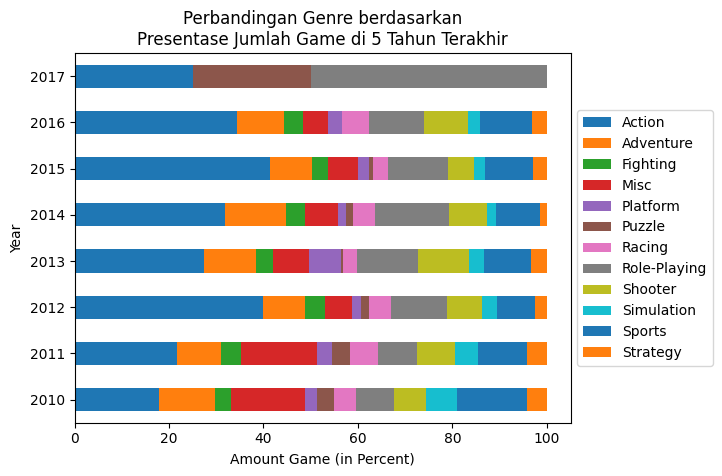

In [ ]:
#Tambahin Bar Value
ax = pt.plot.barh(
    stacked = True,
    xlabel = "Amount Game (in Percent)",
    title = 'Perbandingan Genre berdasarkan\nPresentase Jumlah Game di 5 Tahun Terakhir',
    mark_right = True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Perbandingan Genre berdasarkan Rata - Rata Sales

In [ ]:
df_genre = df_vgsales.groupby('Genre')[['Global_Sales']].mean().round(2).sort_values(by = "Global_Sales",ascending=False).reset_index()
df_genre.head(1)

,Genre,Global_Sales
0,Platform,0.94


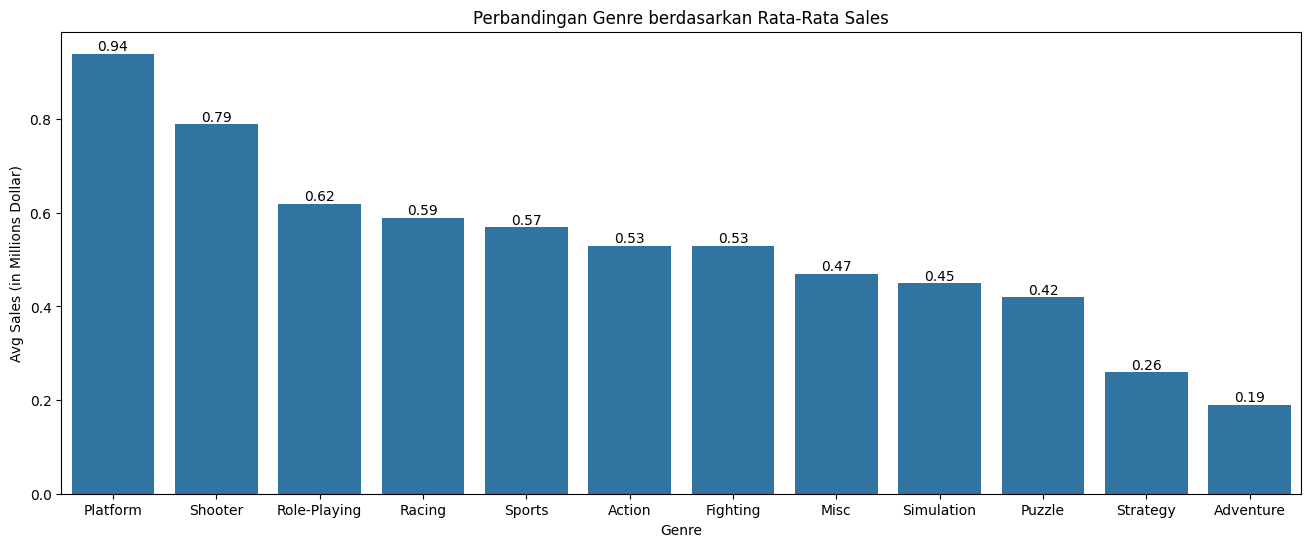

In [ ]:
plt.figure(figsize=(16,6))
ax = sns.barplot(df_genre,x="Genre",y='Global_Sales')
ax.bar_label(ax.containers[0])
plt.title("Perbandingan Genre berdasarkan Rata-Rata Sales")
plt.ylabel("Avg Sales (in Millions Dollar)")
plt.show()

### Genre yang paling laris di Eropa dan Amerika.

In [ ]:
# Genre yang paling laris di Eropa dan Amerika.
df_genresales = df_vgsales.groupby('Genre')[['EU_Sales','NA_Sales']].mean().sort_values(by=['EU_Sales','NA_Sales'], ascending=False)
df_genresales.head(1)

,EU_Sales,NA_Sales
Genre,,
Shooter,0.238442,0.444347


In [ ]:
# Region Eropa
genresaleseu = df_vgsales.groupby('Genre')[['EU_Sales']].mean().round(2).rename({'EU_Sales':'Avg_Sales'},axis=1).sort_values(by='Avg_Sales', ascending=False).reset_index()
genresaleseu


,Genre,Avg_Sales
0,Shooter,0.24
1,Platform,0.23
2,Racing,0.19
3,Action,0.16
4,Sports,0.16
5,Role-Playing,0.13
6,Simulation,0.13
7,Fighting,0.12
8,Misc,0.12
9,Puzzle,0.09


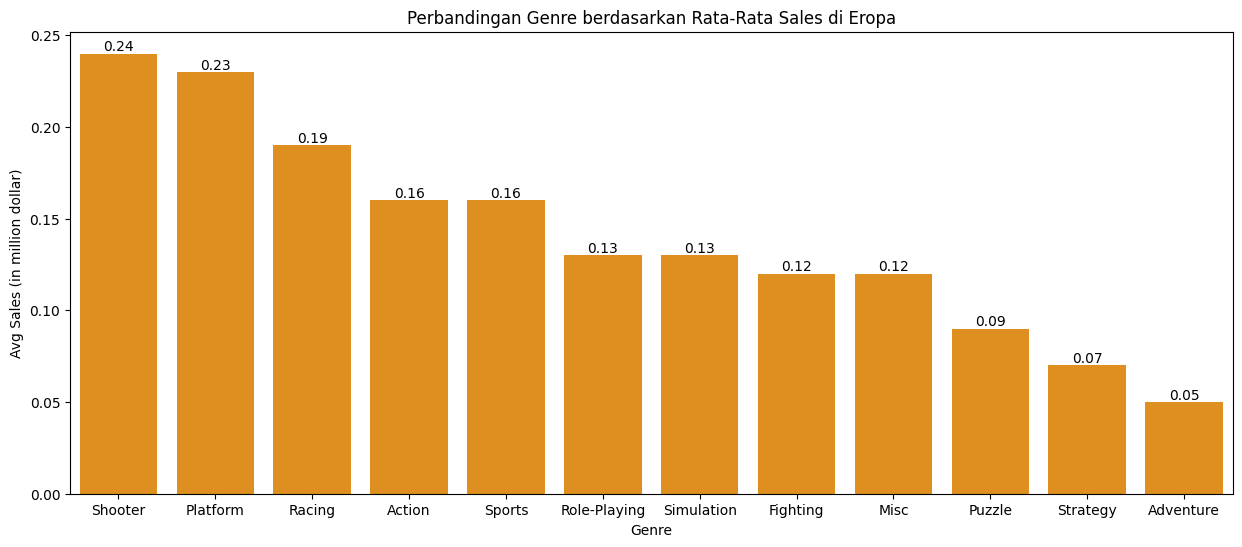

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(genresaleseu,x="Genre",y='Avg_Sales',color="#FF9300")
ax.bar_label(ax.containers[0])
plt.title("Perbandingan Genre berdasarkan Rata-Rata Sales di Eropa")
plt.ylabel("Avg Sales (in million dollar)")
plt.show()

In [ ]:
# Region Amerika Utara
genresalesna = df_vgsales.groupby('Genre')[['NA_Sales']].mean().round(2).rename({'NA_Sales':'Avg_Sales'},axis=1).sort_values(by='Avg_Sales', ascending=False).reset_index()
genresalesna


,Genre,Avg_Sales
0,Platform,0.50
1,Shooter,0.44
2,Racing,0.29
3,Sports,0.29
4,Action,0.26
5,Fighting,0.26
6,Misc,0.23
7,Role-Playing,0.22
8,Puzzle,0.21
9,Simulation,0.21


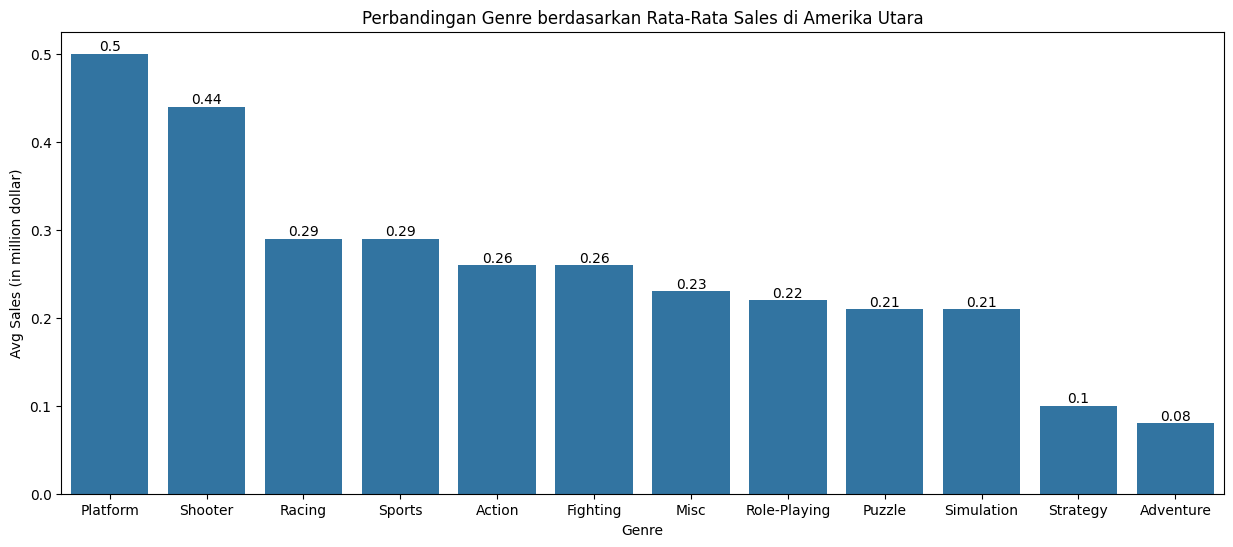

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(genresalesna,x="Genre",y='Avg_Sales')
ax.bar_label(ax.containers[0])
plt.title("Perbandingan Genre berdasarkan Rata-Rata Sales di Amerika Utara")
plt.ylabel("Avg Sales (in million dollar)")
plt.show()

## Analisis Tambahan
---

### Genre yang paling laris di setiap region

In [ ]:
# Region Jepang
genresalesjp = df_vgsales.groupby('Genre')[['JP_Sales']].mean().round(2).rename({'JP_Sales':'Avg_Sales'},axis=1).sort_values(by='Avg_Sales', ascending=False).reset_index()
genresalesjp

,Genre,Avg_Sales
0,Role-Playing,0.24
1,Platform,0.15
2,Fighting,0.10
3,Puzzle,0.10
4,Simulation,0.07
5,Strategy,0.07
6,Misc,0.06
7,Sports,0.06
8,Action,0.05
9,Racing,0.05


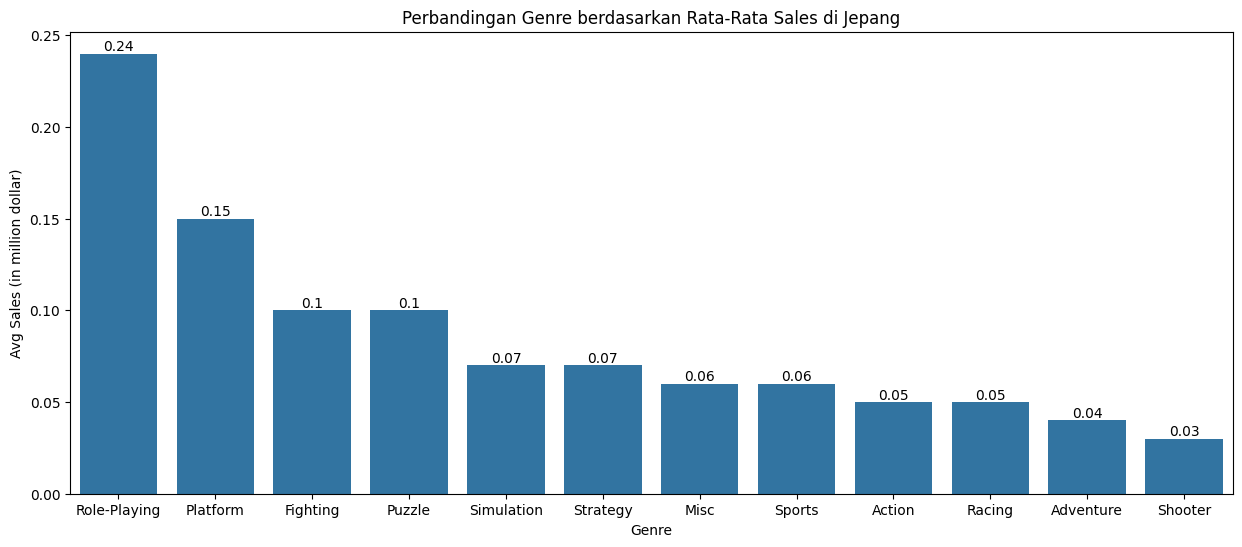

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(genresalesjp,x="Genre",y='Avg_Sales')
ax.bar_label(ax.containers[0])
plt.title("Perbandingan Genre berdasarkan Rata-Rata Sales di Jepang")
plt.ylabel("Avg Sales (in million dollar)")
plt.show()

In [ ]:
# Region Lainnya
genresalesot = df_vgsales.groupby('Genre')[['Other_Sales']].mean().round(2).rename({'Other_Sales':'Avg_Sales'},axis=1).sort_values(by='Avg_Sales', ascending=False).reset_index()
genresalesot

,Genre,Avg_Sales
0,Shooter,0.08
1,Action,0.06
2,Platform,0.06
3,Racing,0.06
4,Sports,0.06
5,Fighting,0.04
6,Misc,0.04
7,Role-Playing,0.04
8,Simulation,0.04
9,Puzzle,0.02


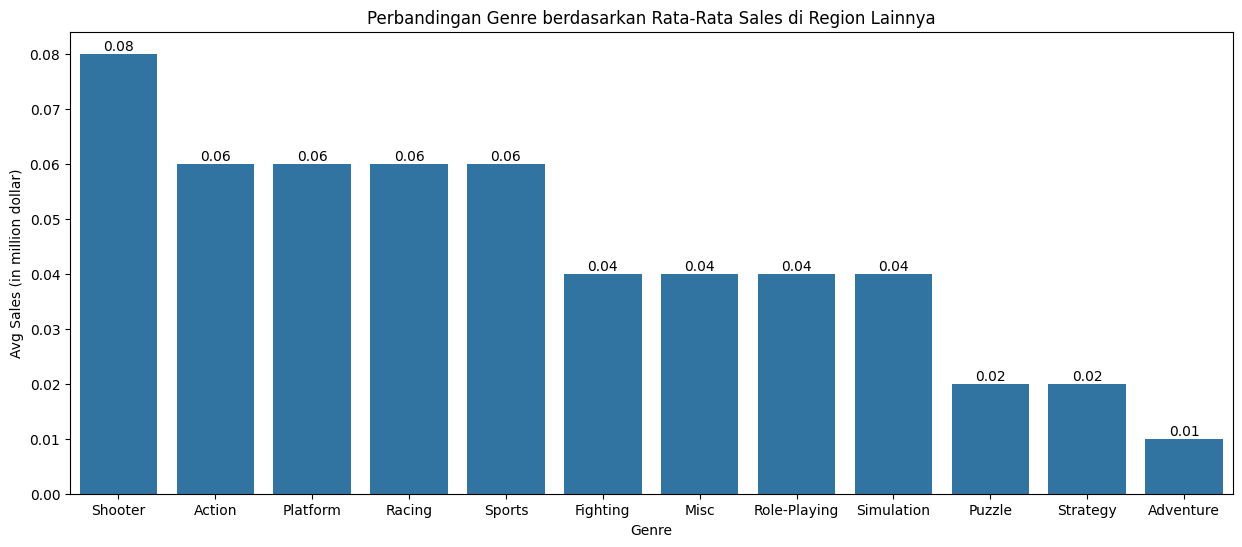

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(genresalesot,x="Genre",y='Avg_Sales')
ax.bar_label(ax.containers[0])
plt.title("Perbandingan Genre berdasarkan Rata-Rata Sales di Region Lainnya")
plt.ylabel("Avg Sales (in million dollar)")
plt.show()

### Perbandingan Platform berdasarkan rata-rata sales di setiap region

In [ ]:
# Platform paling laris di Nort America
platformna = df_vgsales.groupby(["Year","Platform"])["NA_Sales"].mean().round(2).reset_index().sort_values(by=["Year","NA_Sales"],ascending=False)
idmx = platformna.groupby('Year')['NA_Sales'].idxmax()
platformna = platformna.loc[idmx, ["Year","Platform","NA_Sales"]].rename({"NA_Sales":"Avg_Sales"},axis = 1).sort_values(by=["Year"],ascending=False)
platformna = platformna.loc[platformna["Year"].isin([2010,2011,2012,2013,2014,2015])]
platformna

,Year,Platform,Avg_Sales
246,2015,XOne,0.43
236,2014,XOne,0.50
224,2013,X360,0.71
214,2012,X360,0.53
205,2011,X360,0.41
196,2010,X360,0.57


In [ ]:
# Platform dengan genre paling laris di Eropa
platformeu = df_vgsales.groupby(["Year","Platform"])["EU_Sales"].mean().round(2).reset_index().sort_values(by=["Year","EU_Sales"],ascending=False)
idmx = platformeu.groupby('Year')['EU_Sales'].idxmax()
platformeu = platformeu.loc[idmx, ["Year","Platform","EU_Sales"]].rename({"EU_Sales":"Avg_Sales"},axis = 1).sort_values(by=["Year"],ascending=False)
platformeu = platformeu.loc[platformeu["Year"].isin([2010,2011,2012,2013,2014,2015])]
platformeu

,Year,Platform,Avg_Sales
240,2015,PS4,0.37
230,2014,PS4,0.60
219,2013,PS4,0.69
214,2012,X360,0.30
201,2011,PS3,0.27
193,2010,PS3,0.29


In [ ]:
# Platform paling laris di Jepang
platformjp = df_vgsales.groupby(["Year","Platform"])["JP_Sales"].mean().round(2).reset_index().sort_values(by=["Year","JP_Sales"],ascending=False)
idmx = platformjp.groupby('Year')['JP_Sales'].idxmax()
platformjp = platformjp.loc[idmx, ["Year","Platform","JP_Sales"]].rename({"JP_Sales":"Avg_Sales"},axis = 1).sort_values(by=["Year"],ascending=False)
platformjp = platformjp.loc[platformjp["Year"].isin([2010,2011,2012,2013,2014,2015])]
platformjp

,Year,Platform,Avg_Sales
237,2015,3DS,0.18
226,2014,3DS,0.26
215,2013,3DS,0.26
206,2012,3DS,0.21
197,2011,3DS,0.11
194,2010,PSP,0.10


In [ ]:
# Platform paling laris di region lainnya
platformot = df_vgsales.groupby(["Year","Platform"])["Other_Sales"].mean().round(2).reset_index().sort_values(by=["Year","Other_Sales"],ascending=False)
idmx = platformot.groupby('Year')['Other_Sales'].idxmax()
platformot = platformot.loc[idmx, ["Year","Platform","Other_Sales"]].rename({"Other_Sales":"Avg_Sales"},axis = 1).sort_values(by=["Year"],ascending=False)
platformot = platformot.loc[platformot["Year"].isin([2010,2011,2012,2013,2014,2015])]
platformot

,Year,Platform,Avg_Sales
240,2015,PS4,0.13
230,2014,PS4,0.23
219,2013,PS4,0.17
209,2012,PS3,0.11
201,2011,PS3,0.10
193,2010,PS3,0.12


In [ ]:
# Platform paling laris secara global
platform = df_vgsales.groupby(["Year","Platform"])["Global_Sales"].mean().round(2).reset_index().sort_values(by=["Year","Global_Sales"],ascending=False)
idmx = platform.groupby('Year')['Global_Sales'].idxmax()
platform = platform.loc[idmx, ["Year","Platform","Global_Sales"]].rename({"Other_Sales":"Avg_Sales"},axis = 1).sort_values(by=["Year"],ascending=False)
platform = platform.loc[platform["Year"].isin([2010,2011,2012,2013,2014,2015])]
platform

,Year,Platform,Global_Sales
240,2015,PS4,0.84
230,2014,PS4,1.32
219,2013,PS4,1.55
214,2012,X360,0.93
201,2011,PS3,0.72
196,2010,X360,0.92


### Umur game yang paling banyak salesnya

In [ ]:
# Menambahkan kolom umur game
df_vgsales['Games Age'] = 2024 - df_vgsales['Year']
df_vgsales.sort_values(by='Games Age', ascending=True).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Games Age
5957,5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29,4
13665,13667,GRID,PC,2019,Racing,Codemasters,0.00,0.03,0.00,0.01,0.04,5
12807,12809,GRID,DS,2019,Racing,Codemasters,0.04,0.01,0.00,0.00,0.06,5
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,7
16438,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,7


In [ ]:
ages = df_vgsales.groupby(['Name', 'Platform', 'Publisher', 'Genre', 'Games Age'])['Global_Sales'].max().sort_values(ascending=False).reset_index()
ages.head()

,Name,Platform,Publisher,Genre,Games Age,Global_Sales
0,Wii Sports,Wii,Nintendo,Sports,18,82.74
1,Super Mario Bros.,NES,Nintendo,Platform,39,40.24
2,Mario Kart Wii,Wii,Nintendo,Racing,16,35.82
3,Wii Sports Resort,Wii,Nintendo,Sports,15,33.00
4,Pokemon Red/Pokemon Blue,GB,Nintendo,Role-Playing,28,31.37


In [ ]:
# Mengelompokkan game berdasarkan umurnya
def katage (x):
  if x<=10:
    y="0-10"
  elif x<=20:
    y="11-20"
  elif(x<=30):
    y="21-30"
  elif(x<=40):
    y="31-40"
  elif(x<=50):
    y="41-50"
  return y
df_ages = ages.groupby('Games Age')[['Global_Sales']].mean().round(2).sort_values(by='Games Age', ascending=False).reset_index()
df_ages["Game Age"] = df_ages["Games Age"].apply(katage)
df_ages = df_ages.sort_values(by="Game Age")
df_ages.head()

,Games Age,Global_Sales,Game Age
42,4,0.29,0-10
37,10,0.58,0-10
38,9,0.43,0-10
41,5,0.05,0-10
40,7,0.11,0-10


In [ ]:
df_ages.groupby("Game Age")["Games Age"].count()

Game Age
0-10      6
11-20    10
21-30    10
31-40    10
41-50     7
Name: Games Age, dtype: int64

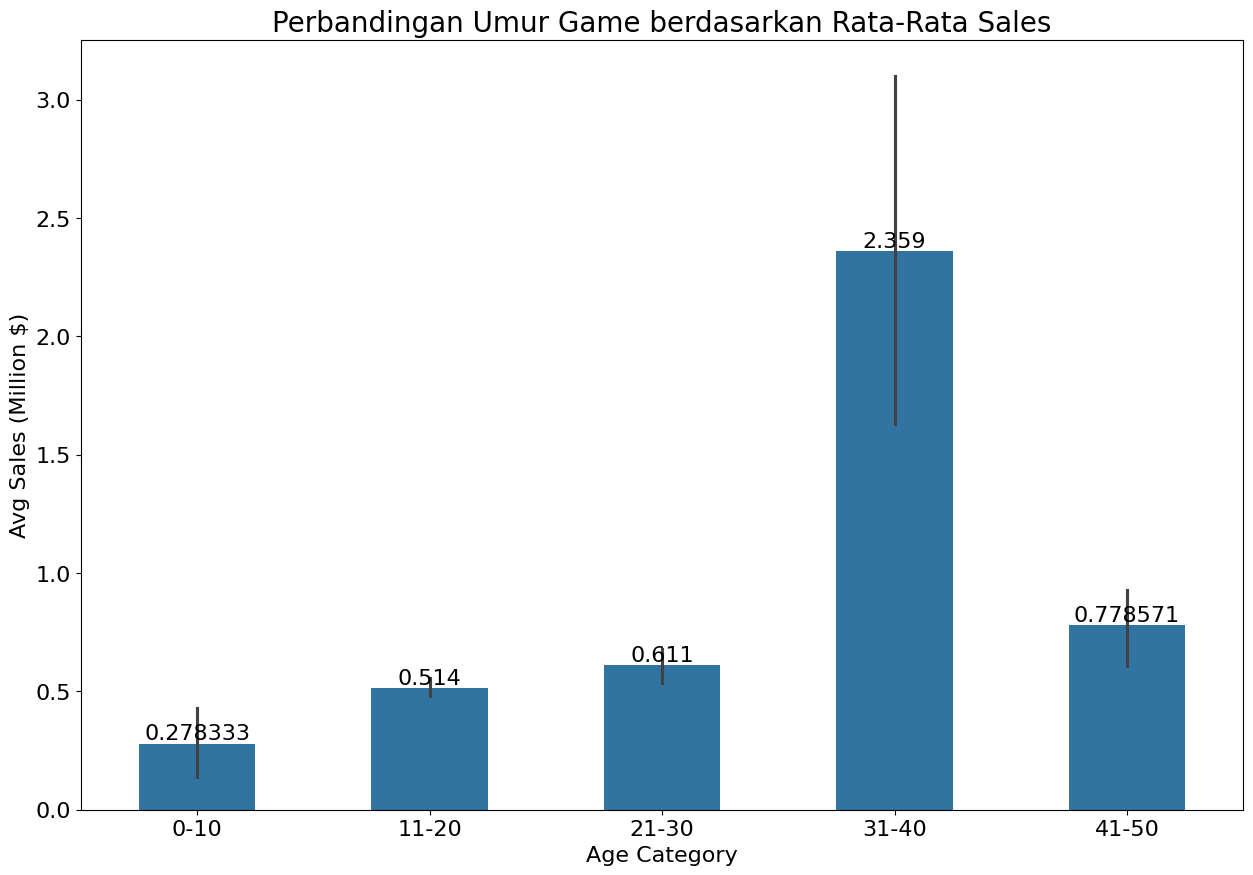

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_ages, x='Game Age', y='Global_Sales', width=0.5)
ax.bar_label(ax.containers[0],fontsize=16)
plt.xlabel('Age Category',fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Avg Sales (Million $)',fontsize=16)
plt.yticks(fontsize=16)
plt.title('Perbandingan Umur Game berdasarkan Rata-Rata Sales',fontsize=20)
plt.show()

Genre Favorit Setiap Region

### Trend pertumbuhan jumlah game per tahunnya

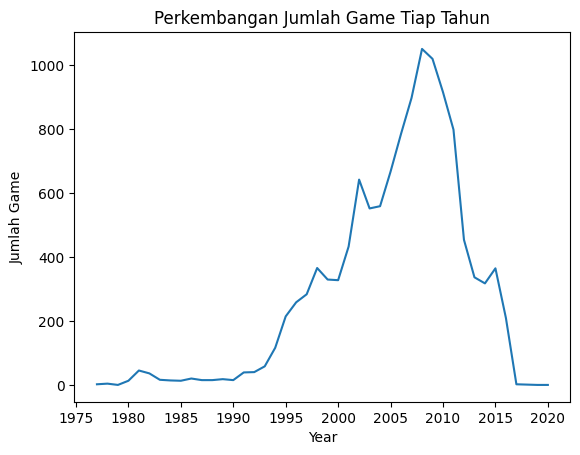

In [ ]:
sales = df_vgsales.groupby(["Year"],as_index=False)["Name"].nunique()
sns.lineplot(data=sales,x="Year",y="Name")
plt.title("Perkembangan Jumlah Game Tiap Tahun")
plt.xticks(ticks=range(1975, 2025 , 5),minor=False)
plt.ylabel("Jumlah Game")
plt.show()

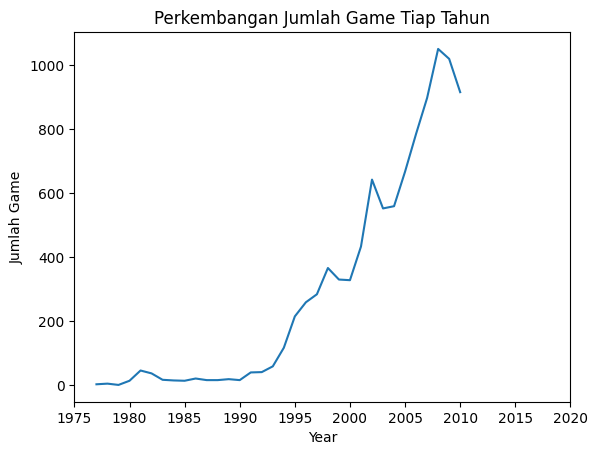

In [ ]:
sales = df_vgsales.groupby(["Year"],as_index=False)["Name"].nunique()
sales = sales.loc[sales["Year"]<=2010]
sns.lineplot(data=sales,x="Year",y="Name")
plt.title("Perkembangan Jumlah Game Tiap Tahun")
plt.xticks(ticks=range(1975, 2025 , 5),minor=False)
plt.ylabel("Jumlah Game")
plt.show()

<ipython-input-75-a753f8e356af>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax= ax.set_xticklabels(["Bandai","Nitendo","Konami","Sony","EA","Ubisoft","Sega","Activision","THQ","Atari"])


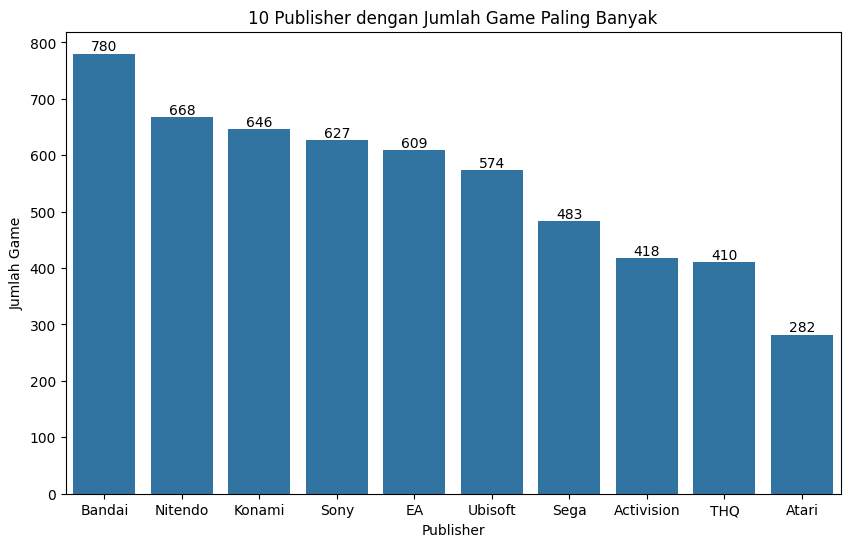

In [ ]:
plt.figure(figsize=(10,6))
pub = df_vgsales.groupby("Publisher")[["Name"]].nunique().sort_values(by="Name",ascending=False).head(10)
ax = sns.barplot(data=pub, x='Publisher', y='Name')
ax.bar_label(ax.containers[0])
ax= ax.set_xticklabels(["Bandai","Nitendo","Konami","Sony","EA","Ubisoft","Sega","Activision","THQ","Atari"])
plt.ylabel('Jumlah Game')
plt.title('10 Publisher dengan Jumlah Game Paling Banyak')
plt.show()

In [ ]:
df_vgsales[["Rank","Name","Publisher","Global_Sales"]].head(10)

,Rank,Name,Publisher,Global_Sales
0,1,Wii Sports,Nintendo,82.74
1,2,Super Mario Bros.,Nintendo,40.24
2,3,Mario Kart Wii,Nintendo,35.82
3,4,Wii Sports Resort,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,Nintendo,31.37
5,6,Tetris,Nintendo,30.26
6,7,New Super Mario Bros.,Nintendo,30.01
7,8,Wii Play,Nintendo,29.02
8,9,New Super Mario Bros. Wii,Nintendo,28.62
9,10,Duck Hunt,Nintendo,28.31


### Publihser dengan penjualan tertinggi di setiap regionnya

#### Berdasarkan Total Sales

In [ ]:
publisher_global = df_vgsales.groupby('Publisher')[['Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False)
publisher_global.head(5)

,Global_Sales
Publisher,
Nintendo,1786.59
Electronic Arts,1113.72
Activision,728.16
Sony Computer Entertainment,609.44
Ubisoft,475.11


In [ ]:
publisher_jpn = df_vgsales.groupby('Publisher')[['JP_Sales']].sum().sort_values(by='JP_Sales',ascending=False)
publisher_jpn.head(5)

,JP_Sales
Publisher,
Nintendo,455.40
Namco Bandai Games,127.80
Konami Digital Entertainment,91.94
Sony Computer Entertainment,74.14
Capcom,68.13


In [ ]:
publisher_na = df_vgsales.groupby('Publisher')[['NA_Sales']].sum().sort_values(by='NA_Sales',ascending=False)
publisher_na.head(5)

,NA_Sales
Publisher,
Nintendo,816.41
Electronic Arts,594.33
Activision,429.40
Sony Computer Entertainment,266.30
Ubisoft,253.50


In [ ]:
publisher_eu = df_vgsales.groupby('Publisher')[['EU_Sales']].sum().sort_values(by='EU_Sales',ascending=False)
publisher_eu.head(5)

,EU_Sales
Publisher,
Nintendo,416.53
Electronic Arts,370.60
Activision,214.60
Sony Computer Entertainment,187.29
Ubisoft,161.90


In [ ]:
publisher_other = df_vgsales.groupby('Publisher')[['Other_Sales']].sum().sort_values(by='Other_Sales',ascending=False)
publisher_other.head(5)

,Other_Sales
Publisher,
Electronic Arts,130.04
Nintendo,95.34
Sony Computer Entertainment,80.64
Activision,75.39
Take-Two Interactive,55.24


#### Berdasarkan Rata-rata Sales

In [ ]:
publisher_global = df_vgsales.groupby('Publisher')[['Global_Sales']].mean().sort_values(by='Global_Sales',ascending=False)
publisher_global.head(5)

,Global_Sales
Publisher,
Palcom,4.17000
Red Orb,2.62000
Nintendo,2.54138
Arena Entertainment,2.36000
UEP Systems,2.25000


In [ ]:
publisher_jpn = df_vgsales.groupby('Publisher')[['JP_Sales']].mean().sort_values(by='JP_Sales',ascending=False)
publisher_jpn.head(5)

,JP_Sales
Publisher,
Enix Corporation,1.080000
"mixi, Inc",0.860000
SquareSoft,0.771731
Quest,0.710000
Nintendo,0.647795


In [ ]:
publisher_na = df_vgsales.groupby('Publisher')[['NA_Sales']].mean().sort_values(by='NA_Sales',ascending=False)
publisher_na.head(5)

,NA_Sales
Publisher,
Palcom,3.38
Arena Entertainment,1.85
RedOctane,1.61
Westwood Studios,1.55
UEP Systems,1.52


In [ ]:
publisher_eu = df_vgsales.groupby('Publisher')[['EU_Sales']].mean().sort_values(by='EU_Sales',ascending=False)
publisher_eu.head(5)

,EU_Sales
Publisher,
Red Orb,1.805
Sony Interacti Entertaiment,1.100
Hello Games,0.740
Valve,0.630
Sony Computer Entertainment Europe,0.600


In [ ]:
publisher_other = df_vgsales.groupby('Publisher')[['Other_Sales']].mean().sort_values(by='Other_Sales',ascending=False)
publisher_other.head(5)

,Other_Sales
Publisher,
Sony Interacti Entertaiment,0.3300
Hello Games,0.2600
Valve,0.2500
Sony Computer Entertainment Europe,0.2280
RedOctane,0.2275


#### Perbandingan Total Sales secara keseluruhan

In [ ]:
publisher_global = df_vgsales.groupby('Publisher')[['Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False)
publisher_global.head(10)

,Global_Sales
Publisher,
Nintendo,1786.59
Electronic Arts,1113.72
Activision,728.16
Sony Computer Entertainment,609.44
Ubisoft,475.11
Take-Two Interactive,399.54
THQ,344.23
Konami Digital Entertainment,286.48
Sega,273.57


## Kesimpulan
---

Kesimpulan :
1. **Platform DS dan PS2** secara global adalah platform yang paling banyak digunakan oleh developer untuk merilis gamenya. Namun semenjak 2010-2015,  terjadi pergeseran penggunaan platform seperti, **DS -> 3DS, PSP -> PSV, PS3 -> PS4, Wii -> Wii U, X360 -> Xone**. Sehingga developer bisa menggunakan platform yang terbaru dari masing masing publisher berdasarkan region rilis gamenya.

2. Genre yang paling banyak digunakan game adalah **Action**. Dimana banyak pemain yang menyukai genre ini. Namun terdapat banyak persaingan game dengan genre action.  Sehingga jika developer yakin akan gamenya dan berani mengambil resiko maka dapat membuat game action. Atau membuat game bergenre **Platformer dan Shooter** dimana belum banyak pesaing dan rata rata salesnya tinggi.

3. Dari perbandingan antara publisher diseluruh dunia, **Publisher Nitendo** memiliki prospek yang bagus berdasarkan jumlah game yang di rilis dan total sales yang dihasilkan. Dimana Nitendo mendominasi Pasar Video Game Global.


## Rekomendasi
---

**Rekomendasi untuk Investor**
1. Dengan bertumbuhnya industri game dan esport, ada peluang investasi pada industri tersebut.
2. Ada publisher yang mendominasi penjualan dalam berbagai region yaitu Nitendo
3. Peluang investasi ke Nintendo :
  - Perkembangan saham Nitendo secara keseluruhan masih naik walaupun beberapa bulan terakhir turun karena jepang lagi resesi. [Link](https://www.google.com/finance/quote/7974:TYO?sa=X&ved=2ahUKEwiVjtP4yOOEAxUfZmwGHe6FAoUQ3ecFegQIHhAf&window=YTD)
  - Nitendo mengeluarkan console baru yang populer sehingga meningkatkan pendapatan bersih nitendo dan sahamnya. [Link](https://www.investopedia.com/articles/investing-strategy/090416/how-us-investors-can-buy-nintendo-stock-ntdoy.asp)
  - Nitendo menyadari akan perubahan zaman dalam industri game sehigga mengubah manajemen mereka agar bisa menjaga basis pengguna (console & PC) Sehingga terdapat kiasan Nintendo is the cheapest company in the industry with the most valuable IPs. [Link](https://seekingalpha.com/article/4415898-nintendo-offers-huge-investment-opportunity)

**Rekomendasi untuk Developer**
1. Nitendo memiliki cakupan genre game yang luas serta merilis game game yang berkualitas, hal ini dapat dimanfaatkan para developer untuk bekerjasama dengan nitendo dalam mengembangkan suatu game.

2. Alasan Kerjasama dengan nitendo
 - Penerbitan platform baru yaitu nitendo switch yang populer dengan penjualan console yang tertinggi. [Link](https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles)
 - Tranformasi manajemen Nitendo yang lebih friendly dan terstruktur untuk. [Link](https://www.gamedeveloper.com/business/-nintendo-has-its-own-way---how-it-makes-games-and-works-with-external-devs#close-modal)
